In [1]:
#Importing Modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Data Exploration/Cleaning

data = pd.read_csv("Housing.csv")
data = data.join(pd.get_dummies(data.furnishingstatus))
data = data.drop(['furnishingstatus'], axis=1)
data = data.replace({'yes' : True})
data = data.replace({'no' : False})
print(data.info())
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    bool 
 6   guestroom        545 non-null    bool 
 7   basement         545 non-null    bool 
 8   hotwaterheating  545 non-null    bool 
 9   airconditioning  545 non-null    bool 
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    bool 
 12  furnished        545 non-null    bool 
 13  semi-furnished   545 non-null    bool 
 14  unfurnished      545 non-null    bool 
dtypes: bool(9), int64(6)
memory usage: 30.5 KB
None
        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420 

In [4]:
x = data.drop(['price'], axis=1)
y = data['price']

      area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
230   5400         2          1        2      True      False     False   
67    7700         3          2        1      True      False     False   
140   5800         3          2        4      True      False     False   
538   3649         2          1        1      True      False     False   
107   6420         3          1        3      True      False      True   
..     ...       ...        ...      ...       ...        ...       ...   
7    16200         5          3        2      True      False     False   
240   3840         3          1        2      True      False     False   
202   4120         2          1        1      True      False      True   
510   2880         3          1        1     False      False     False   
174   3800         3          1        2      True       True      True   

     hotwaterheating  airconditioning  parking  prefarea  furnished  \
230            False        

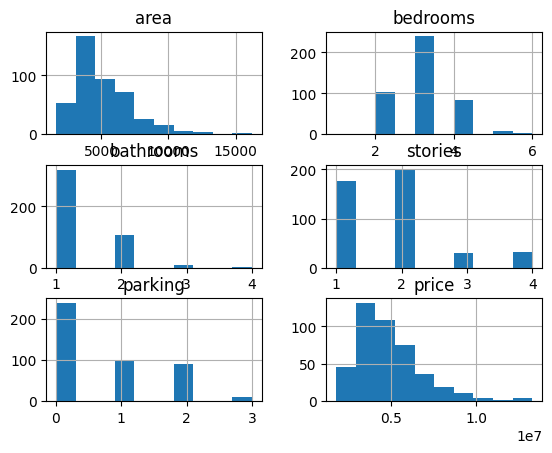

In [5]:
#Spliting Data for testing and training

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
train_data = x_train.join(y_train)
test_data = x_test.join(y_test)
print(train_data)
train_data.hist()
plt.show()


      area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
230   5400         2          1        2      True      False     False   
67    7700         3          2        1      True      False     False   
140   5800         3          2        4      True      False     False   
538   3649         2          1        1      True      False     False   
107   6420         3          1        3      True      False      True   
..     ...       ...        ...      ...       ...        ...       ...   
7    16200         5          3        2      True      False     False   
240   3840         3          1        2      True      False     False   
202   4120         2          1        1      True      False      True   
510   2880         3          1        1     False      False     False   
174   3800         3          1        2      True       True      True   

     hotwaterheating  airconditioning  parking  prefarea  furnished  \
230            False        

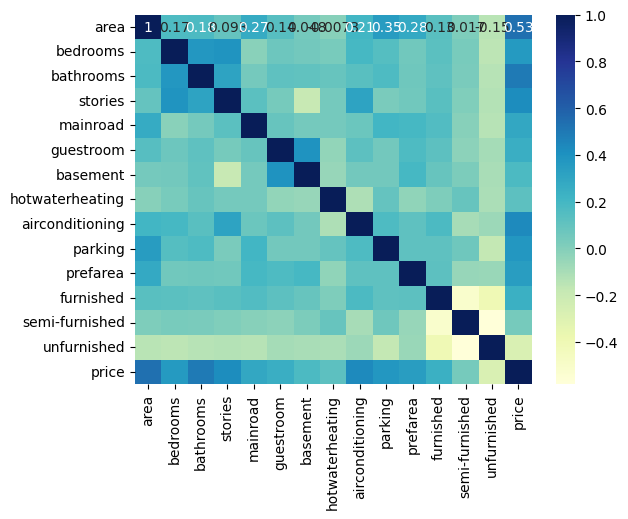

In [6]:
print(train_data)
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [7]:
#Linear Regression

reg = LinearRegression()
reg.fit(x_train,y_train)
r_s = reg.score(x_test,y_test)

#Random Forest Regression

forest = RandomForestRegressor()
forest.fit(x_train,y_train)
f_s = forest.score(x_test,y_test)

In [11]:
print(f'Linear Regression Score {r_s}')
print(f'Random Forest Score {f_s}')

Linear Regression Score 0.7315650917650547
Random Forest Score 0.670188729819212


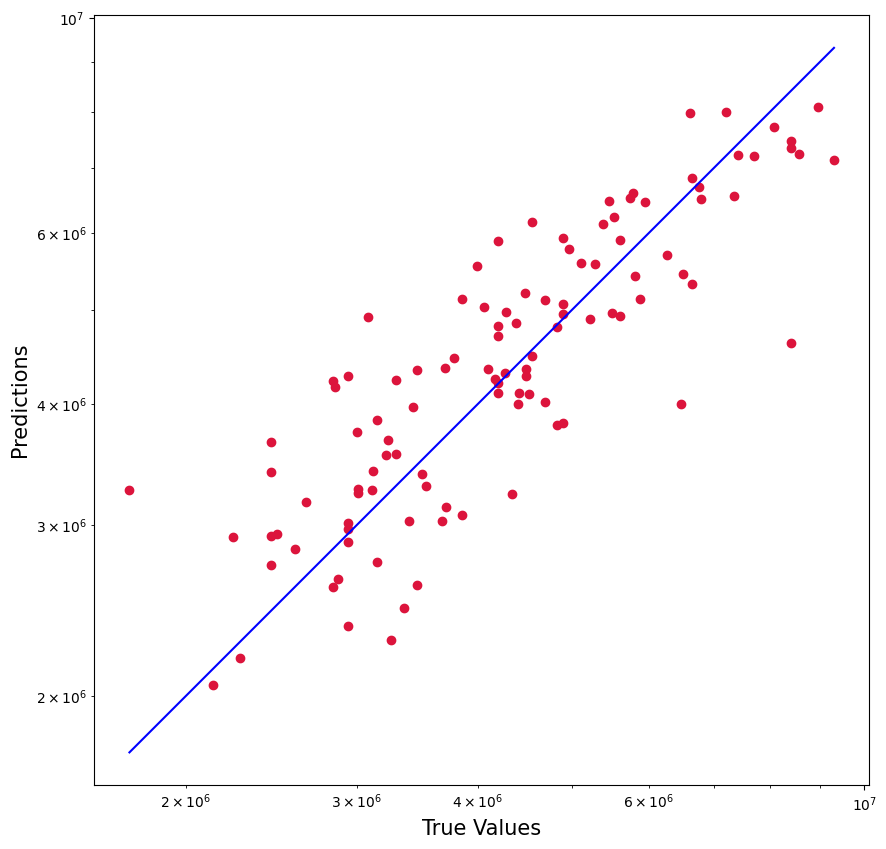

      area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
456   2398         3          1        1      True      False     False   
412   2610         3          1        2      True      False      True   
251   3450         3          1        2      True      False      True   
146  10500         2          1        1      True      False     False   
196   7686         3          1        1      True       True      True   
..     ...       ...        ...      ...       ...        ...       ...   
481   2700         2          1        1     False      False     False   
139   6360         3          1        1      True       True      True   
453   3069         2          1        1      True      False     False   
502   3480         2          1        1      True      False     False   
302   2145         3          1        3      True      False     False   

     hotwaterheating  airconditioning  parking  prefarea  furnished  \
456            False        

In [10]:
#Real vs Predicted rpice of test data linear regression

prediction = reg.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()
print(x_test)

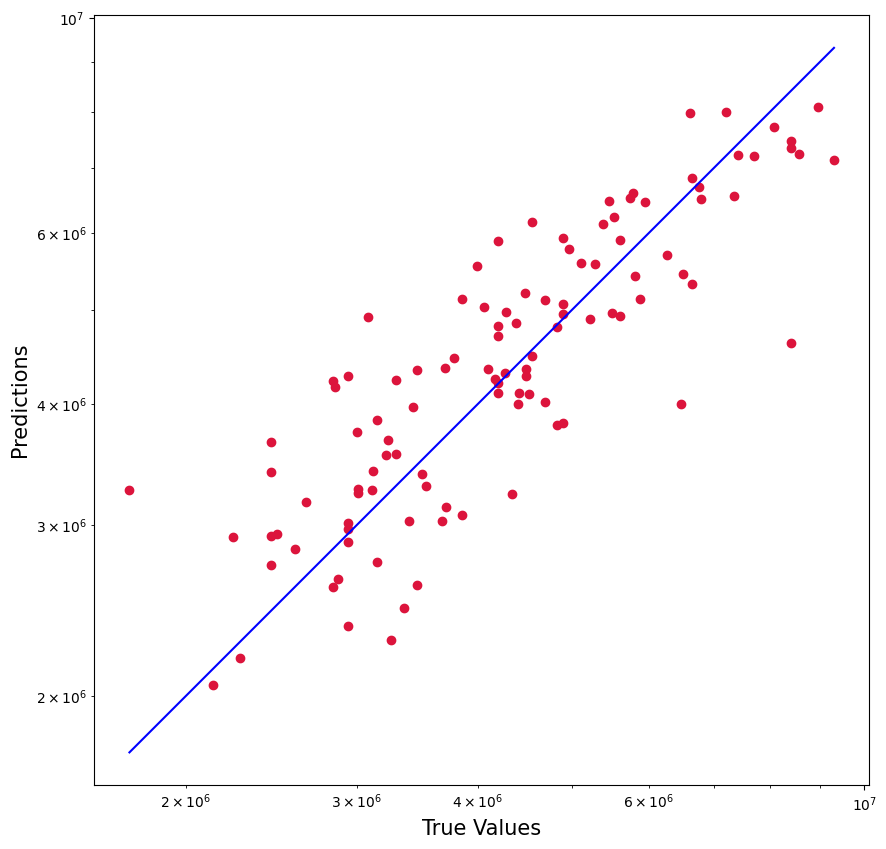

      area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
456   2398         3          1        1      True      False     False   
412   2610         3          1        2      True      False      True   
251   3450         3          1        2      True      False      True   
146  10500         2          1        1      True      False     False   
196   7686         3          1        1      True       True      True   
..     ...       ...        ...      ...       ...        ...       ...   
481   2700         2          1        1     False      False     False   
139   6360         3          1        1      True       True      True   
453   3069         2          1        1      True      False     False   
502   3480         2          1        1      True      False     False   
302   2145         3          1        3      True      False     False   

     hotwaterheating  airconditioning  parking  prefarea  furnished  \
456            False        

In [12]:
#Real vs Predicted rpice of test data random forest

prediction = reg.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()
print(x_test)